IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang ZHANG & Antoine LECOMTE

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [2]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [3]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [4]:
newsgroups_df_neitoie = newsgroups_df.dropna(subset=['messages'])
stop_words_list = stop_words_df['stopword'].tolist()
newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))
newsgroups_df_neitoie

/var/folders/x0/9jmwqqtj7s13pdfprxbhp6r00000gn/T/ipykernel_96969/959504396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))


,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[old, jasmine, drive, cannot, use, new, system..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, cpu, clone, motherboard, tried, mo..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, space, points, specif..."


In [5]:
index_mots = sorted(set(word for mots in newsgroups_df_neitoie['les_mots'] for word in mots))

print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# pour contrôler:
for i in range(30,len(index_mots),100):
    print("\ten position ",i," --> ", index_mots[i])


Nombre de mots trouvés:  90850
Les 10 premiers : ["''a", "''achzq", "''afduqy", "''afg", "''ai", "''ai''q", "''al", "''bpl", "''bs", "''c"]
	en position  30  -->  'afdzqvg'al
	en position  130  -->  'i'
	en position  230  -->  'qp
	en position  330  -->  'wx
	en position  430  -->  aarskog
	en position  530  -->  abhorrence
	en position  630  -->  abridgement
	en position  730  -->  acadamy
	en position  830  -->  accom
	en position  930  -->  accusers
	en position  1030  -->  acknowledgment
	en position  1130  -->  activitiests
	en position  1230  -->  adda
	en position  1330  -->  aditives
	en position  1430  -->  ado
	en position  1530  -->  adventists
	en position  1630  -->  aerodynamics
	en position  1730  -->  afflicting
	en position  1830  -->  agabus
	en position  1930  -->  agonies
	en position  2030  -->  ahmad
	en position  2130  -->  aire
	en position  2230  -->  ajteel
	en position  2330  -->  alarm
	en position  2430  -->  aleuts
	en position  2530  -->  alive
	en positi

In [6]:
index_mots

["''a",
 "''achzq",
 "''afduqy",
 "''afg",
 "''ai",
 "''ai''q",
 "''al",
 "''bpl",
 "''bs",
 "''c",
 "''d",
 "''gtl",
 "''gtuq",
 "''k",
 "''l",
 "''o",
 "''ox",
 "''oy",
 "''qr",
 "''qveiqvei",
 "''qvf",
 "''qx",
 "''qy",
 "''qy''",
 "''qy''q",
 "'a",
 "'ab",
 "'abedk",
 "'achz",
 "'afdu",
 "'afdzqvg'al",
 "'ah",
 "'ai",
 "'ai''d",
 "'al",
 "'amour",
 "'amtwy",
 "'ao",
 "'asau",
 "'atr",
 "'au",
 "'av",
 "'awg",
 "'ax",
 "'axl",
 "'ay",
 "'b",
 "'b'ax",
 "'bav",
 "'baxx",
 "'bc",
 "'bme",
 "'bp",
 "'bpk",
 "'bpl",
 "'bpl'",
 "'bplqrs",
 "'bpu",
 "'bq",
 "'bqt",
 "'br",
 "'brz",
 "'bs",
 "'bs'q",
 "'bs'qqxuq",
 "'c",
 "'cd",
 "'ce",
 "'cexy",
 "'cgnz",
 "'cj",
 "'cnvc",
 "'cq",
 "'cr",
 "'d",
 "'d'cbgv",
 "'dbssnv",
 "'dj",
 "'do",
 "'dpv",
 "'dq'c",
 "'dr",
 "'dv",
 "'dws",
 "'dy",
 "'e",
 "'eb",
 "'ed",
 "'egu",
 "'ej",
 "'em",
 "'encw",
 "'eo",
 "'er",
 "'et",
 "'et'",
 "'eu",
 "'evz",
 "'ew",
 "'ex",
 "'f",
 "'fh",
 "'fj",
 "'fndv",
 "'fnef",
 "'fp",
 "'fpod",
 "'frk",
 "'g",
 "'gb

In [7]:
from scipy.sparse import csr_matrix

def bag_of_words_sparse_manual(texts_tokenized, vocab, mode="count"):
    """
    :param mode: 可选值为 'count', 'binary', 'freq'
    """
    from scipy.sparse import csr_matrix
    vocab_index = {word: i for i, word in enumerate(vocab)}

    rows, cols, data = [], [], []

    for row_idx, tokens in enumerate(texts_tokenized):
        word_counts = {}
        for word in tokens:
            if word in vocab_index:
                col_idx = vocab_index[word]
                word_counts[col_idx] = word_counts.get(col_idx, 0) + 1

        total_words = sum(word_counts.values())

        for col_idx, count in word_counts.items():
            rows.append(row_idx)
            cols.append(col_idx)

            if mode == "count":
                value = count
            elif mode == "binary":
                value = 1
            elif mode == "freq":
                value = count / total_words
            else:
                raise ValueError("Unsupported mode: choose from 'count', 'binary', 'freq'")

            data.append(value)

    n_rows = len(texts_tokenized)
    n_cols = len(vocab)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols), dtype=float)
    return sparse_matrix, vocab_index



In [8]:
from scipy.sparse import csr_matrix
import numpy as np
import math

def bag_of_words_tfidf_manual(texts_tokenized, vocab):
    """
    :param texts_tokenized: List of list of tokens
    :param vocab: list of vocabulary words
    :return: TF-IDF sparse matrix (csr_matrix), vocab_index
    """
    vocab_index = {word: i for i, word in enumerate(vocab)}
    N_docs = len(texts_tokenized)
    
    # 1. 计算 DF（Document Frequency）
    df_counts = np.zeros(len(vocab))
    for tokens in texts_tokenized:
        unique_words = set(tokens)
        for word in unique_words:
            if word in vocab_index:
                df_counts[vocab_index[word]] += 1
                
    # 避免除以零
    df_counts[df_counts == 0] = 1

    # 2. 构建 TF-IDF 稀疏矩阵
    rows, cols, data = [], [], []

    for doc_idx, tokens in enumerate(texts_tokenized):
        tf_counts = {}
        for word in tokens:
            if word in vocab_index:
                idx = vocab_index[word]
                tf_counts[idx] = tf_counts.get(idx, 0) + 1

        total_words = sum(tf_counts.values())

        for idx, tf in tf_counts.items():
            tf_val = tf / total_words
            idf_val = math.log(N_docs / df_counts[idx])
            tfidf = tf_val * idf_val
            
            rows.append(doc_idx)
            cols.append(idx)
            data.append(tfidf)
    
    mat = csr_matrix((data, (rows, cols)), shape=(N_docs, len(vocab)))
    return mat, vocab_index


In [9]:
# 再调用
X_sparse, vec = bag_of_words_sparse_manual(newsgroups_df_neitoie['les_mots'],index_mots)

# 打印检查
print(X_sparse.shape)
print(type(X_sparse))
import pandas as pd
df_bow = pd.DataFrame(X_sparse.toarray(), columns=index_mots)
df_bow



(18466, 90850)
<class 'scipy.sparse._csr.csr_matrix'>


,''a,''achzq,''afduqy,''afg,''ai,''ai''q,''al,''bpl,''bs,''c,...,zznkzz,zznp,zzq,zzrk,zzs,zzvsi,zzz's,zzzoh,zzzzzz,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 检查"sure"是否在词表中
if "sure" in index_mots:
    col_idx = index_mots.index("sure")
    rows_with_sure = X_sparse[:, col_idx].nonzero()[0]  # 获取非0的行索引
    print(f"'sure' 出现在 {len(rows_with_sure)} 条文档中")
    print("示例文档索引：", rows_with_sure[:5])
else:
    print("'sure' 不在词表中")


'sure' 出现在 1452 条文档中
示例文档索引： [  0   5  61  87 118]


In [11]:
np.random.seed(42)  # Pour reproductibilité

# Pourcentage d'exemples de chaque classe à garder :
taux = 0.05  # 5%

# Déclaration des variables qui seront initialisées dans la boucle :
df_train = pd.DataFrame()  
df_test = pd.DataFrame()

les_targets = newsgroups_df_neitoie['target'].unique()

for l in les_targets:
    nb_total = newsgroups_df_neitoie['target'].value_counts()[l]  # Nombre total d'exemples pour la classe l
    nb_pris = int(nb_total * taux)  # Nombre d'exemples à prendre pour l'entraînement
    print(f"Nombre d'exemples du label {l} pris pour apprendre: {nb_pris}")

    # Récupération des indices des exemples de cette classe
    les_ids = newsgroups_df_neitoie[newsgroups_df_neitoie['target'] == l].index.to_list()
    
    # Mélanger les indices aléatoirement
    np.random.shuffle(les_ids)

    # Séparer les indices pour l'entraînement et le test
    ids_train = les_ids[:nb_pris]  # 5% pour l'entraînement
    ids_test = les_ids[nb_pris:]   # Le reste pour le test

    # Ajouter les données correspondantes aux DataFrames
    df_train = pd.concat([df_train, newsgroups_df_neitoie.loc[ids_train]], ignore_index=True)
    df_test = pd.concat([df_test, newsgroups_df_neitoie.loc[ids_test]], ignore_index=True)

# Résultat :
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 10 pris pour apprendre: 49
Nombre d'exemples du label 3 pris pour apprendre: 48
Nombre d'exemples du label 17 pris pour apprendre: 46
Nombre d'exemples du label 4 pris pour apprendre: 46
Nombre d'exemples du label 12 pris pour apprendre: 48
Nombre d'exemples du label 19 pris pour apprendre: 30
Nombre d'exemples du label 11 pris pour apprendre: 48
Nombre d'exemples du label 13 pris pour apprendre: 48
Nombre d'exemples du label 0 pris pour apprendre: 39
Nombre d'exemples du label 8 pris pour apprendre: 48
Nombre d'exemples du label 7 pris pour apprendre: 47
Nombre d'exemples du label 5 pris pour apprendre: 49
Nombre d'exemples du label 1 pris pour apprendre: 47
Nombre d'exemples du label 14 pris pour apprendre: 48
Nombre d'exemples du label 16 pris pour apprendre: 44
Nombre d'exemples du label 6 pris pour apprendre: 48
Nombre d'exemples du label 9 pris pour apprendre: 48
Nombre d'exemples du label 18 pris pour apprendre: 38
Nombre d'exemples du label 2 pris pou

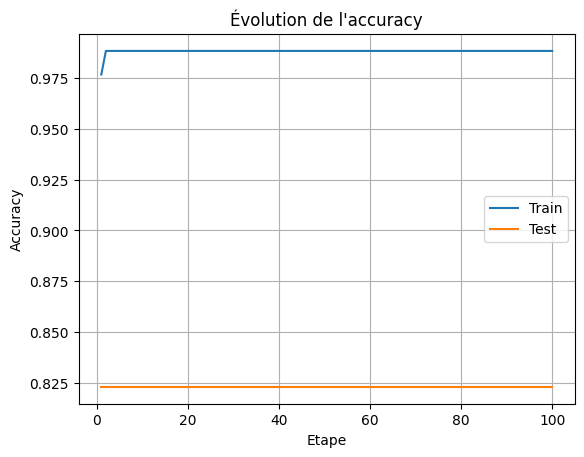

Accuracy finale (train):  0.9883720930232558
Accuracy finale (test) :  0.8229607250755288


In [23]:
# - classification binaire
# - perceptron

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

X_train_bin = ut.df2array(df_binaire, index_mots)
y_train_bin = df_binaire['target_bin'].values

X_test_bin = ut.df2array(df_test_bin, index_mots)
y_test_bin = df_test_bin['target_bin'].values

perceptron = classif.ClassifierPerceptron(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

train_acc = []
test_acc = []

# Réalisation de N itérations
N = 100
for _ in range(N):
    perceptron.train_step(X_train_bin, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

plt.plot(range(1,N+1),train_acc, label='Train')
plt.plot(range(1,N+1),test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.title("Évolution de l'accuracy")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train): ",  perceptron.accuracy(X_train_bin, y_train_bin))
print("Accuracy finale (test) : ", perceptron.accuracy(X_test_bin, y_test_bin))

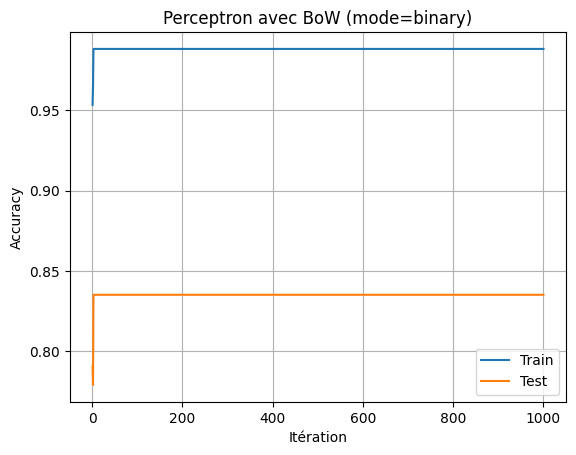

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8350453172205438


In [ ]:
# - classification binaire
# - perceptron

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# 使用 BoW
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()


# 初始化感知机
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# 训练 + 评估
N = 100
train_acc, test_acc = [], []

for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

# 绘图
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=binary)")
plt.legend()
plt.grid(True)
plt.show()

# 最终结果
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])


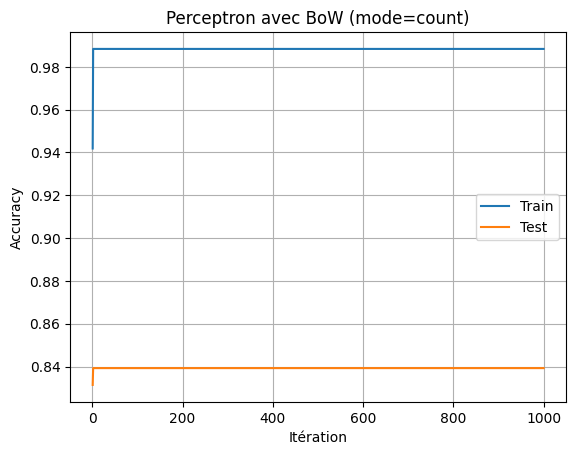

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8392749244712991


In [ ]:
# - classification binaire
# - perceptron

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# 使用 BoW
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()


# 初始化感知机
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# 训练 + 评估
N = 100
train_acc, test_acc = [], []

for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

# 绘图
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

# 最终结果
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])


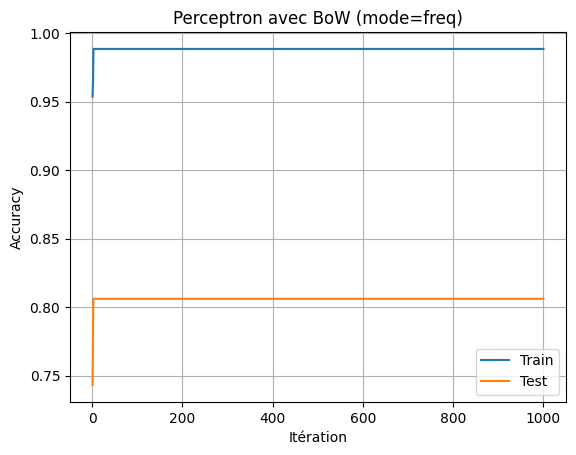

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8060422960725075


In [ ]:
# - classification binaire
# - perceptron

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# 使用 BoW
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()


# 初始化感知机
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# 训练 + 评估
N = 100
train_acc, test_acc = [], []

for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

# 绘图
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

# 最终结果
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])


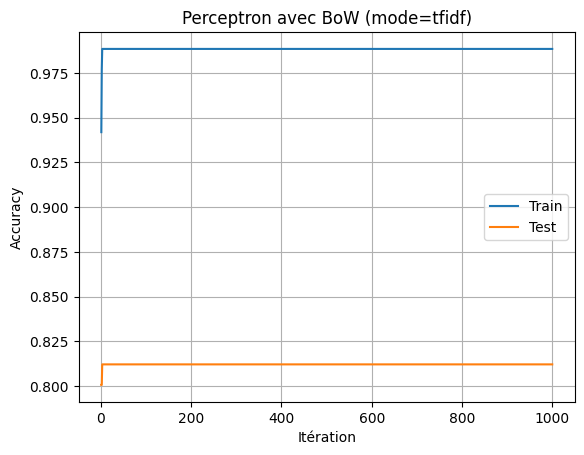

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8120845921450152


In [ ]:
# - classification binaire
# - perceptron

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# 初始化感知机
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# 训练 + 评估
N = 100
train_acc, test_acc = [], []

for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

# 绘图
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

# 最终结果
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

In [17]:
# - classification multi-classe
# - perceptron

classifiers = {}
for classe in les_targets:
    y_train_multilabel = np.where(df_train['target'] == classe, +1, -1)
    X_train_multi = ut.df2array(df_train, index_mots)

    clf = classif.ClassifierPerceptron(X_train_multi.shape[1])
    clf.train(X_train_multi, y_train_multilabel)
    classifiers[classe] = clf


X_test_multi = ut.df2array(df_test, index_mots)
y_true = df_test['target'].values

y_pred = []
for x in X_test_multi:
    scores = {classe: clf.score(x) for classe, clf in classifiers.items()}
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

y_pred = np.array(y_pred)
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (multi-classe): {accuracy_multi:.4f}")


Accuracy (multi-classe): 0.4460


In [18]:
mat_train = ut.df2array(df_train,index_mots)

In [19]:
# Initialisation du dictionnaire de fréquences
frequences = dict()

# Boucle sur chaque target (0-19)
for l in les_targets:
    # Initialisation des fréquences des mots pour le target l
    frequences[l] = [0] * len(index_mots)
    
    # Sélection des exemples avec le target l
    exemples_label_l = df_train[df_train['target'] == l]
    
    # Boucle sur chaque exemple du target l
    for _, row in exemples_label_l.iterrows():
        mots_message = set(row['les_mots'])
        for mot in mots_message:
            if mot in index_mots:
                index = index_mots.index(mot)
                frequences[l][index] += 1

    sum_frequencies = len(df_train)
        
    if sum_frequencies > 0:
        for j in range(len(frequences[l])):
            frequences[l][j] /= sum_frequencies


In [20]:
# Affichage de quelques valeurs de fréquence non nulles 
print("Seuls les 10 premiers non nuls sont affichés.")        
for l in frequences:
    nb= 0
    print("Pour le target",l, ":")
    for j in range(0,len(frequences[l])):
        if frequences[l][j] != 0:
            if (nb < 10):
                print(f'\t {index_mots[j]}:\t {frequences[l][j]:0.6f}')
            nb +=1

Seuls les 10 premiers non nuls sont affichés.
Pour le target 10 :
	 aargh:	 0.001093
	 abc:	 0.004372
	 abc's:	 0.001093
	 able:	 0.001093
	 abotu:	 0.001093
	 absolutely:	 0.002186
	 accomplished:	 0.001093
	 according:	 0.001093
	 across:	 0.001093
	 act:	 0.001093
Pour le target 3 :
	 's:	 0.002186
	 aaahhhh:	 0.001093
	 able:	 0.007650
	 ac:	 0.001093
	 accelerator:	 0.001093
	 access:	 0.002186
	 accessing:	 0.002186
	 across:	 0.001093
	 actually:	 0.003279
	 add:	 0.002186
Pour le target 17 :
	 's:	 0.003279
	 abdomen:	 0.001093
	 ability:	 0.001093
	 able:	 0.003279
	 abnormal:	 0.001093
	 abominable:	 0.001093
	 abominations:	 0.001093
	 abroad:	 0.001093
	 absolutely:	 0.002186
	 ac:	 0.001093
Pour le target 4 :
	 's:	 0.001093
	 absolutely:	 0.001093
	 accel:	 0.001093
	 accelerator:	 0.002186
	 accesses:	 0.002186
	 actually:	 0.001093
	 add:	 0.001093
	 adding:	 0.002186
	 address:	 0.001093
	 adds:	 0.001093
Pour le target 12 :
	 's:	 0.002186
	 abbreviation:	 0.001093
	 

In [21]:
print("Frequences max:")
for i in les_targets:
    max_freq = max(frequences[i])
    index_max = np.argmax(frequences[i])
    mot_max = index_mots[index_max]
    print(f"\tpour le label {i}: {max_freq:.4f} pour le mot '{mot_max}'")


Frequences max:
	pour le label 10: 0.0240 pour le mot 'game'
	pour le label 3: 0.0197 pour le mot 'would'
	pour le label 17: 0.0208 pour le mot 'would'
	pour le label 4: 0.0164 pour le mot 'would'
	pour le label 12: 0.0197 pour le mot 'would'
	pour le label 19: 0.0109 pour le mot 'one'
	pour le label 11: 0.0208 pour le mot 'would'
	pour le label 13: 0.0164 pour le mot 'one'
	pour le label 0: 0.0164 pour le mot 'would'
	pour le label 8: 0.0197 pour le mot 'bike'
	pour le label 7: 0.0131 pour le mot 'also'
	pour le label 5: 0.0251 pour le mot 'x'
	pour le label 1: 0.0197 pour le mot 'would'
	pour le label 14: 0.0208 pour le mot 'space'
	pour le label 16: 0.0208 pour le mot 'would'
	pour le label 6: 0.0186 pour le mot 'sale'
	pour le label 9: 0.0164 pour le mot 'game'
	pour le label 18: 0.0230 pour le mot 'people'
	pour le label 2: 0.0251 pour le mot 'windows'
	pour le label 15: 0.0295 pour le mot 'one'


In [22]:
for l in les_targets:
    proba = len(df_train[df_train['target'] == l]) / len(df_train)
    print(f'p({l}) = {proba:0.4f}')


p(10) = 0.0536
p(3) = 0.0525
p(17) = 0.0503
p(4) = 0.0503
p(12) = 0.0525
p(19) = 0.0328
p(11) = 0.0525
p(13) = 0.0525
p(0) = 0.0426
p(8) = 0.0525
p(7) = 0.0514
p(5) = 0.0536
p(1) = 0.0514
p(14) = 0.0525
p(16) = 0.0481
p(6) = 0.0525
p(9) = 0.0525
p(18) = 0.0415
p(2) = 0.0514
p(15) = 0.0536


### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


## Tâches à réaliser

### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
